<h1> Linear regression

## Question 2
For the next exercise, you are going to use the Airline Costs dataset available to download from airline_costs_new.csv The dataset has the following attributes, among others:
<ol>
<li>Airline name</li>
<li>Length of flight in miles
</li>
<li>Speed of plane in miles per hour
</li>
<li>Daily flight time per plane in hours
</li>
<li>Customers served in 1000s
</li>
<li>Total operating cost in cents per revenue ton-mile
</li>
<li>Total assets in 100,000s </li>
<li>Investments and special funds in 100,000s
</li>
</ol>


Use a linear regression model to predict the number of customers each airline serves from its length of flight and daily flight time per plane. 

Next, build another regression model to predict the total assets of an airline from the customers served by the airline. 

Do you have any insight about the data from the last two regression models?

### Part a
Simple Linear Regression Math by Hand

There are just a handful of steps in linear regression.
<ul>
    <li>Step 1: Calculate X*Y, X<sup>2</sup>, and Y<sup>2</sup></li>
    <li>Step 2: Calculate ΣX, ΣY, ΣX*Y, ΣX<sup>2</sup>, and ΣY<sup>2</sup></li>
    <li>Step 3: Calculate b<sub>0</sub></li>
    <li>Step 4: Calculate b<sub>1</sub></li>
    <li>Step 5: Place b<sub>0</sub> and b<sub>1</sub> in the estimated linear regression equation.</li>
</ul>

The estimated linear regression equation is: ŷ = b<sub>0</sub> + b<sub>1</sub>*x

The formula to calculate b<sub>0</sub> is: [(ΣY)(ΣX<sup>2</sup>) – (ΣX)(ΣX*Y)]  /  [n(ΣX<sup>2</sup>) – (ΣX)<sup>2</sup>]

The formula to calculate b<sub>1</sub> is: [n(ΣXY) – (ΣX)(ΣY)]  /  [n(ΣX<sup>2</sup>) – (ΣX)<sup>2</sup>]



In [141]:
#Type the answers from your manual calculations here.
import pandas as pd

# step 1
df = pd.read_csv('airline_costs.csv')
X = df['Daily_flight_time']
Y = df.Population
XY = X * Y
xSqr = X**2
ySqr = Y**2
df.corr()


C:\Users\jpolo\AppData\Local\Temp\ipykernel_10572\1036574857.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Length,Speed,Daily_flight_time,Population,Operating_cost,Revenue,Ton-mile,Available,Total_assets,Investments,Adjusted_assets
Length,1.000000,0.938286,0.478035,0.788239,-0.437464,0.958008,0.772875,0.908446,0.806172,0.628581,0.821445
Speed,0.938286,1.000000,0.565055,0.716681,-0.528801,0.938063,0.770849,0.908352,0.719942,0.584059,0.730485
Daily_flight_time,0.478035,0.565055,1.000000,0.361647,-0.660324,0.534152,0.671103,0.526046,0.275244,0.312776,0.267080
Population,0.788239,0.716681,0.361647,1.000000,-0.308841,0.816832,0.579182,0.795831,0.904802,0.809213,0.907807
Operating_cost,-0.437464,-0.528801,-0.660324,-0.308841,1.000000,-0.500726,-0.693901,-0.513138,-0.251434,-0.204765,-0.255009
Revenue,0.958008,0.938063,0.534152,0.816832,-0.500726,1.000000,0.803545,0.972775,0.772333,0.617884,0.784827
Ton-mile,0.772875,0.770849,0.671103,0.579182,-0.693901,0.803545,1.000000,0.690696,0.539381,0.428241,0.548553
Available,0.908446,0.908352,0.526046,0.795831,-0.513138,0.972775,0.690696,1.000000,0.721773,0.581580,0.732884
Total_assets,0.806172,0.719942,0.275244,0.904802,-0.251434,0.772333,0.539381,0.721773,1.000000,0.928162,0.998713
Investments,0.628581,0.584059,0.312776,0.809213,-0.204765,0.617884,0.428241,0.581580,0.928162,1.000000,0.908089


In [142]:
# step 2
sumOfXs = X.sum()
sumOfYs = Y.sum()
sumXsByYs = XY.sum()
sumOfSqrXs = (X**2).sum()
sumOfSqrYs = (Y**2).sum()
n = len(df)

In [143]:
# step 3 & 4
b0 = ((sumOfYs * sumOfSqrXs) - (sumOfXs * sumXsByYs)) / ((n * sumOfSqrXs) - ((sumOfXs)**2))
b1 = ((n * sumXsByYs) - (sumOfXs * sumOfYs)) / ((n * sumOfSqrXs) - ((sumOfXs)**2))
b0

-10885.816128817647

In [144]:
 # step 5

linearRegression = b0 + b1 * X
linearRegression

0     13065.765674
1     16324.751394
2      6587.059121
3     15029.010084
4     18445.055357
5      7450.886661
6     22881.987724
7     16089.162065
8     14636.361202
9     18955.498904
10    26415.827662
11     8079.124872
12    18445.055357
13     4231.165829
14    13458.414556
15    12201.938133
16    21625.511302
17    15696.513183
18    16128.426953
19    21036.537979
20    16795.930053
21    13262.090115
22    12084.143469
23    12987.235897
24    14243.712320
25    15146.804748
26     6783.383562
27    15303.864301
28    25944.649004
29    -1658.567402
30    11573.699922
Name: Daily_flight_time, dtype: float64

In [145]:
df['Y'] = linearRegression
df

,Airline,Length,Speed,Daily_flight_time,Population,Operating_cost,Revenue,Ton-mile,Available,Total_assets,Investments,Adjusted_assets,Y
0,All American,57,133,6.10,20200,116.3,0.96,0.400,2.400,21.13,3.21,17.92,13065.765674
1,American,270,216,6.93,56928,43.0,3.98,0.689,5.776,1436.53,165.22,1271.31,16324.751394
2,Bonanza,100,140,4.45,183,141.5,0.79,0.358,2.207,6.65,0.01,6.64,6587.059121
3,Braniff,176,182,6.60,11869,50.6,2.57,0.557,4.614,160.30,5.81,154.49,15029.010084
4,Capital,142,167,7.47,41097,51.0,2.68,0.510,5.255,195.02,6.06,188.96,18445.055357
5,Central,51,134,4.67,1757,318.5,0.35,0.167,2.096,14.02,0.01,14.01,7450.886661
6,C&S,175,175,8.60,18000,59.2,2.17,0.558,3.889,114.16,3.11,111.05,22881.987724
7,Colonial,112,150,6.87,13500,77.0,1.68,0.505,3.327,35.34,0.79,34.55,16089.162065
8,Continental,131,179,6.50,3831,62.3,1.70,0.537,3.166,49.74,3.49,46.25,14636.361202
9,Delta,174,191,7.60,13119,45.3,2.74,0.598,4.582,174.32,3.87,170.45,18955.498904


<AxesSubplot: xlabel='Daily_flight_time', ylabel='Population'>

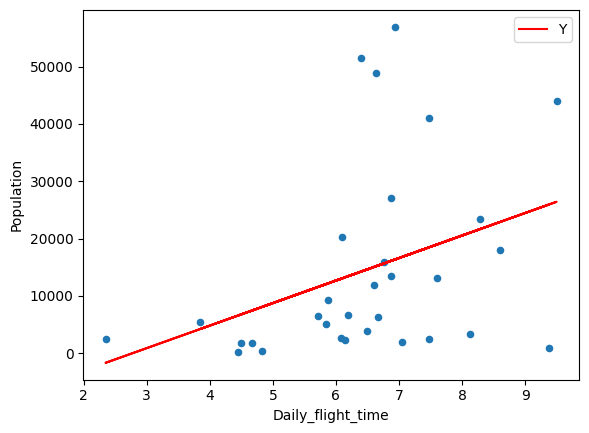

In [146]:

# regrLength = df.plot.scatter(x = 'Length', y = 'Population')
# df.plot(x = 'Length', y = 'Y', color = 'red', ax=regrLength)
regrTime = df.plot.scatter(x = 'Daily_flight_time', y = 'Population')
df.plot(x = 'Daily_flight_time', y = 'Y', color = 'red', ax=regrTime)




### Part b

Finally, use python to find the linear regression model and report it in
appropriate terms (do not just dump the output from python)

I have included the solution below please read through the code.

In [147]:
from sysconfig import get_python_version
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
# get_python_version().run_line_magic('matplotlib', 'inline')
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from IPython import get_ipython

get_ipython().run_line_magic('matplotlib', 'inline')

In [148]:
#Reading the data (note this is a tab seperated file)
populationData = pd.read_csv('airline_costs.csv')


In [149]:
#Dropping null values
populationData = populationData.dropna()

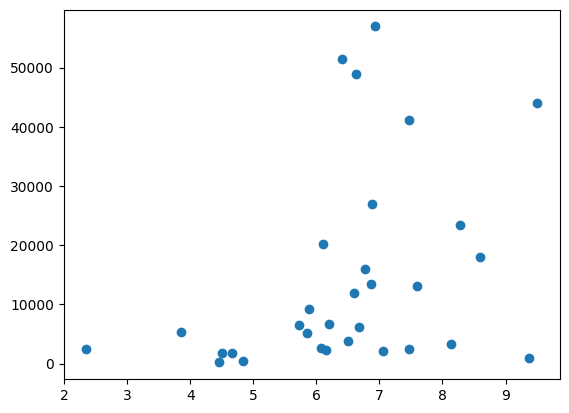

In [150]:
#Scatter plot of time and population
plt.scatter(populationData.Daily_flight_time, populationData.Population)

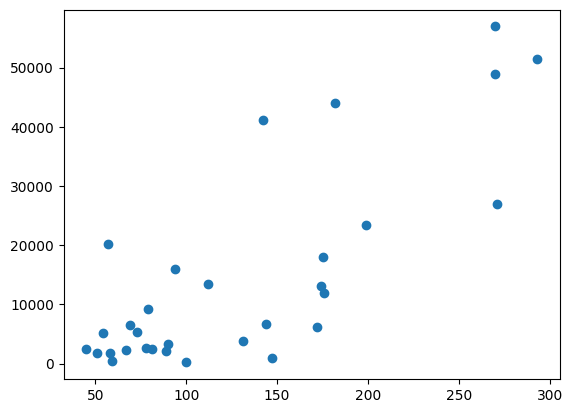

In [151]:
#Scatter plot of length and population
plt.scatter(populationData.Length, populationData.Population)

In [152]:
#Creating X and y and making a linear model
X = populationData[['Daily_flight_time', 'Length']]
X = sm.add_constant(X)
lr_model = sm.OLS(populationData.Population, X).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Population   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     23.00
Date:                Sun, 19 Feb 2023   Prob (F-statistic):           1.23e-06
Time:                        18:11:59   Log-Likelihood:                -330.06
No. Observations:                  31   AIC:                             666.1
Df Residuals:                      28   BIC:                             670.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -7792.0706   8396.998     -0.928      0.361    -2.5e+04    9408.401
Daily_flight_time  -213.3340   1436.955     -0.148      0.883   -3156.803    2730.134
Length              183.2956     30.414      6.027      0.000     120.995     245.596
==============================================================================
Omnibus:                        2.469   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.291   Jarque-Bera (JB):                1.851
Skew:                           0.598   Prob(JB):                        0.396
Kurtosis:                       2.931   Cond. No.                         653.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""